# Start up

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName('my_spark') \
    .getOrCreate()

In [1]:
spark

# Read data from file

In [6]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType

data_schema = [
    StructField('Id', IntegerType(), True),
    StructField('SepalLengthCm', DoubleType(), True),
    StructField('SepalWidthCm', DoubleType(), True),
    StructField('PetalLengthCm', DoubleType(), True),
    StructField('PetalWidthCm', DoubleType(), True),
    StructField('Species', StringType(), True)
]
final_struct = StructType(fields = data_schema)

df = spark.read.csv(
    '__datasets/Iris.csv',
    sep = ',',
    header = True,
    schema = final_struct)

df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



# Read from DB

In [ ]:
df = spark.read \
    .format('jdbc') \
    .option('url', 'jdbc:postgresql://localhost:5432/databasename') \
    .option('dbtable', 'tablename') \
    .option('user', 'username') \
    .option('password', 'password') \
    .option('driver', 'org.postgresql.Driver') \
    .load()

df.printSchema()

# Data inspection methods

In [7]:
df.dtypes

[('Id', 'int'),
 ('SepalLengthCm', 'double'),
 ('SepalWidthCm', 'double'),
 ('PetalLengthCm', 'double'),
 ('PetalWidthCm', 'double'),
 ('Species', 'string')]

In [9]:
df.head(5)

[Row(Id=1, SepalLengthCm=5.1, SepalWidthCm=3.5, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=2, SepalLengthCm=4.9, SepalWidthCm=3.0, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=3, SepalLengthCm=4.7, SepalWidthCm=3.2, PetalLengthCm=1.3, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=4, SepalLengthCm=4.6, SepalWidthCm=3.1, PetalLengthCm=1.5, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=5, SepalLengthCm=5.0, SepalWidthCm=3.6, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa')]

In [11]:
df.show(5)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [47]:
df.show(3, vertical = True)

-RECORD 0--------------------
 Id            | 1           
 SepalLengthCm | 5.1         
 SepalWidthCm  | 3.5         
 PetalLengthCm | 1.4         
 PetalWidthCm  | 0.2         
 Species       | Iris-setosa 
-RECORD 1--------------------
 Id            | 2           
 SepalLengthCm | 4.9         
 SepalWidthCm  | 3.0         
 PetalLengthCm | 1.4         
 PetalWidthCm  | 0.2         
 Species       | Iris-setosa 
-RECORD 2--------------------
 Id            | 3           
 SepalLengthCm | 4.7         
 SepalWidthCm  | 3.2         
 PetalLengthCm | 1.3         
 PetalWidthCm  | 0.2         
 Species       | Iris-setosa 
only showing top 3 rows



In [46]:
df.take(11)

[Row(Id=1, SepalLengthCm=5.1, SepalWidthCm=3.5, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=2, SepalLengthCm=4.9, SepalWidthCm=3.0, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=3, SepalLengthCm=4.7, SepalWidthCm=3.2, PetalLengthCm=1.3, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=4, SepalLengthCm=4.6, SepalWidthCm=3.1, PetalLengthCm=1.5, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=5, SepalLengthCm=5.0, SepalWidthCm=3.6, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=6, SepalLengthCm=5.4, SepalWidthCm=3.9, PetalLengthCm=1.7, PetalWidthCm=0.4, Species='Iris-setosa'),
 Row(Id=7, SepalLengthCm=4.6, SepalWidthCm=3.4, PetalLengthCm=1.4, PetalWidthCm=0.3, Species='Iris-setosa'),
 Row(Id=8, SepalLengthCm=5.0, SepalWidthCm=3.4, PetalLengthCm=1.5, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=9, SepalLengthCm=4.4, SepalWidthCm=2.9, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=10, SepalLe

In [38]:
df.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+--------------+
|summary|                Id|     SepalLengthCm|       SepalWidthCm|     PetalLengthCm|      PetalWidthCm|       Species|
+-------+------------------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|               150|                150|               150|               150|           150|
|   mean|              75.5| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          NULL|
| stddev|43.445367992456916|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          NULL|
|    min|                 1|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               150|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+----

In [19]:
df.columns

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [20]:
df.count()

150

In [23]:
df.distinct().count()

150

# Columns manipulation

In [26]:
df = df.withColumn('new_column', df.Id)
df.show(5)

+---+-------------+------------+-------------+------------+-----------+----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|new_column|
+---+-------------+------------+-------------+------------+-----------+----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|         1|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|         2|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|         3|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|         4|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|         5|
+---+-------------+------------+-------------+------------+-----------+----------+
only showing top 5 rows



In [27]:
df = df.withColumnRenamed('new_column', 'new_column_2')
df.show(5)

+---+-------------+------------+-------------+------------+-----------+------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|new_column_2|
+---+-------------+------------+-------------+------------+-----------+------------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|           1|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|           2|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|           3|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|           4|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|           5|
+---+-------------+------------+-------------+------------+-----------+------------+
only showing top 5 rows



In [28]:
df = df.drop('new_column_2')
df.show(5)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



# Get the data from DataFrame

In [29]:
df.select('Id').show(5)

+---+
| Id|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
+---+
only showing top 5 rows



In [30]:
df.select('PetalLengthCm', 'PetalWidthCm').show(5)

+-------------+------------+
|PetalLengthCm|PetalWidthCm|
+-------------+------------+
|          1.4|         0.2|
|          1.4|         0.2|
|          1.3|         0.2|
|          1.5|         0.2|
|          1.4|         0.2|
+-------------+------------+
only showing top 5 rows



In [31]:
from pyspark.sql.functions import col, lit

petalLenghts = df.filter((col('PetalLengthCm') >= lit('1.5')) & (col('PetalLengthCm') <= lit('3.5')))
print(petalLenghts.count())
petalLenghts.show(5)

32
+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
| 11|          5.4|         3.7|          1.5|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [33]:
petalLenghts = df.filter(df.PetalLengthCm.between(1.5, 3.5))
print(petalLenghts.count())
petalLenghts.show(5)

32
+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
| 11|          5.4|         3.7|          1.5|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [43]:
df.groupby('Species').avg().show()

+---------------+-------+------------------+------------------+------------------+------------------+
|        Species|avg(Id)|avg(SepalLengthCm)| avg(SepalWidthCm)|avg(PetalLengthCm)| avg(PetalWidthCm)|
+---------------+-------+------------------+------------------+------------------+------------------+
| Iris-virginica|  125.5| 6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Iris-setosa|   25.5| 5.005999999999999|3.4180000000000006|             1.464|0.2439999999999999|
|Iris-versicolor|   75.5|             5.936|2.7700000000000005|              4.26|1.3259999999999998|
+---------------+-------+------------------+------------------+------------------+------------------+



In [44]:
df.createOrReplaceTempView('T')
spark.sql('SELECT count(*) from T').show()

+--------+
|count(1)|
+--------+
|     150|
+--------+



In [55]:
import pyspark.sql.functions as F

rows = df.select('Id', 'PetalLengthCm', 'PetalWidthCm', F.when(df.PetalLengthCm <= 1.5, 1).otherwise(0))
print(rows.count())
rows.show(15)

150
+---+-------------+------------+--------------------------------------------------+
| Id|PetalLengthCm|PetalWidthCm|CASE WHEN (PetalLengthCm <= 1.5) THEN 1 ELSE 0 END|
+---+-------------+------------+--------------------------------------------------+
|  1|          1.4|         0.2|                                                 1|
|  2|          1.4|         0.2|                                                 1|
|  3|          1.3|         0.2|                                                 1|
|  4|          1.5|         0.2|                                                 1|
|  5|          1.4|         0.2|                                                 1|
|  6|          1.7|         0.4|                                                 0|
|  7|          1.4|         0.3|                                                 1|
|  8|          1.5|         0.2|                                                 1|
|  9|          1.4|         0.2|                                        

In [59]:
rows = df.withColumn('PetalLengthCm_info',
    F.when(
        F.col('PetalLengthCm') <= 1.65, F.lit('less_than_avg')
    ).when(
        (F.col('PetalLengthCm') > 1.65) & (F.col('PetalLengthCm') <= 3.0), F.lit('avg')
    ).otherwise('more_than_normal'))

rows \
    .groupby('PetalLengthCm_info') \
    .agg(F.count('Id') \
    .alias('iris_count')) \
    .orderBy('iris_count', ascending = False).show()

+------------------+----------+
|PetalLengthCm_info|iris_count|
+------------------+----------+
|  more_than_normal|        99|
|     less_than_avg|        44|
|               avg|         7|
+------------------+----------+



In [60]:
rows \
    .groupby('PetalLengthCm_info') \
    .agg(F.count('Id') \
    .alias('iris_count')) \
    .orderBy('iris_count', ascending = True).show()

+------------------+----------+
|PetalLengthCm_info|iris_count|
+------------------+----------+
|               avg|         7|
|     less_than_avg|        44|
|  more_than_normal|        99|
+------------------+----------+



In [66]:
rows.show()

+---+-------------+------------+-------------+------------+-----------+------------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|PetalLengthCm_info|
+---+-------------+------------+-------------+------------+-----------+------------------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|     less_than_avg|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|     less_than_avg|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|     less_than_avg|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|     less_than_avg|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|     less_than_avg|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|               avg|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|     less_than_avg|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|     less_than_avg|

In [67]:
from pyspark.sql.window import Window

window = Window.partitionBy('PetalLengthCm_info')
rows.withColumn('average_SepalLengthCm', F.avg('SepalLengthCm').over(window)).orderBy('Id').show(100)

+---+-------------+------------+-------------+------------+---------------+------------------+---------------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|        Species|PetalLengthCm_info|average_SepalLengthCm|
+---+-------------+------------+-------------+------------+---------------+------------------+---------------------+
|  1|          5.1|         3.5|          1.4|         0.2|    Iris-setosa|     less_than_avg|    4.972727272727273|
|  2|          4.9|         3.0|          1.4|         0.2|    Iris-setosa|     less_than_avg|    4.972727272727273|
|  3|          4.7|         3.2|          1.3|         0.2|    Iris-setosa|     less_than_avg|    4.972727272727273|
|  4|          4.6|         3.1|          1.5|         0.2|    Iris-setosa|     less_than_avg|    4.972727272727273|
|  5|          5.0|         3.6|          1.4|         0.2|    Iris-setosa|     less_than_avg|    4.972727272727273|
|  6|          5.4|         3.9|          1.7|         0.4|    I

# Iterate over DataFrame

In [70]:
rows_collect = rows.collect()

i = 0
for row in rows_collect:
    print(f"{row['Id']}) {row['Species']} - {row['PetalLengthCm_info']}")
    i += 1
    if i == 10:
        break

1) Iris-setosa - less_than_avg
2) Iris-setosa - less_than_avg
3) Iris-setosa - less_than_avg
4) Iris-setosa - less_than_avg
5) Iris-setosa - less_than_avg
6) Iris-setosa - avg
7) Iris-setosa - less_than_avg
8) Iris-setosa - less_than_avg
9) Iris-setosa - less_than_avg
10) Iris-setosa - less_than_avg


In [71]:
rows_iterator = rows.rdd.toLocalIterator()

i = 0
for row in rows_iterator:
    print(f"{row['Id']}) {row['Species']} - {row['PetalLengthCm_info']}")
    i += 1
    if i == 10:
        break

1) Iris-setosa - less_than_avg
2) Iris-setosa - less_than_avg
3) Iris-setosa - less_than_avg
4) Iris-setosa - less_than_avg
5) Iris-setosa - less_than_avg
6) Iris-setosa - avg
7) Iris-setosa - less_than_avg
8) Iris-setosa - less_than_avg
9) Iris-setosa - less_than_avg
10) Iris-setosa - less_than_avg


# Visualization

In [83]:
selected_df = rows \
    .select(
    [
        'SepalLengthCm', 
        'SepalWidthCm', 
        'PetalLengthCm', 
        'PetalWidthCm',
        'Species',
        'PetalLengthCm_info'
    ]) \
    .toPandas()

In [84]:
selected_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalLengthCm_info
0,5.1,3.5,1.4,0.2,Iris-setosa,less_than_avg
1,4.9,3.0,1.4,0.2,Iris-setosa,less_than_avg
2,4.7,3.2,1.3,0.2,Iris-setosa,less_than_avg
3,4.6,3.1,1.5,0.2,Iris-setosa,less_than_avg
4,5.0,3.6,1.4,0.2,Iris-setosa,less_than_avg
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,more_than_normal
146,6.3,2.5,5.0,1.9,Iris-virginica,more_than_normal
147,6.5,3.0,5.2,2.0,Iris-virginica,more_than_normal
148,6.2,3.4,5.4,2.3,Iris-virginica,more_than_normal


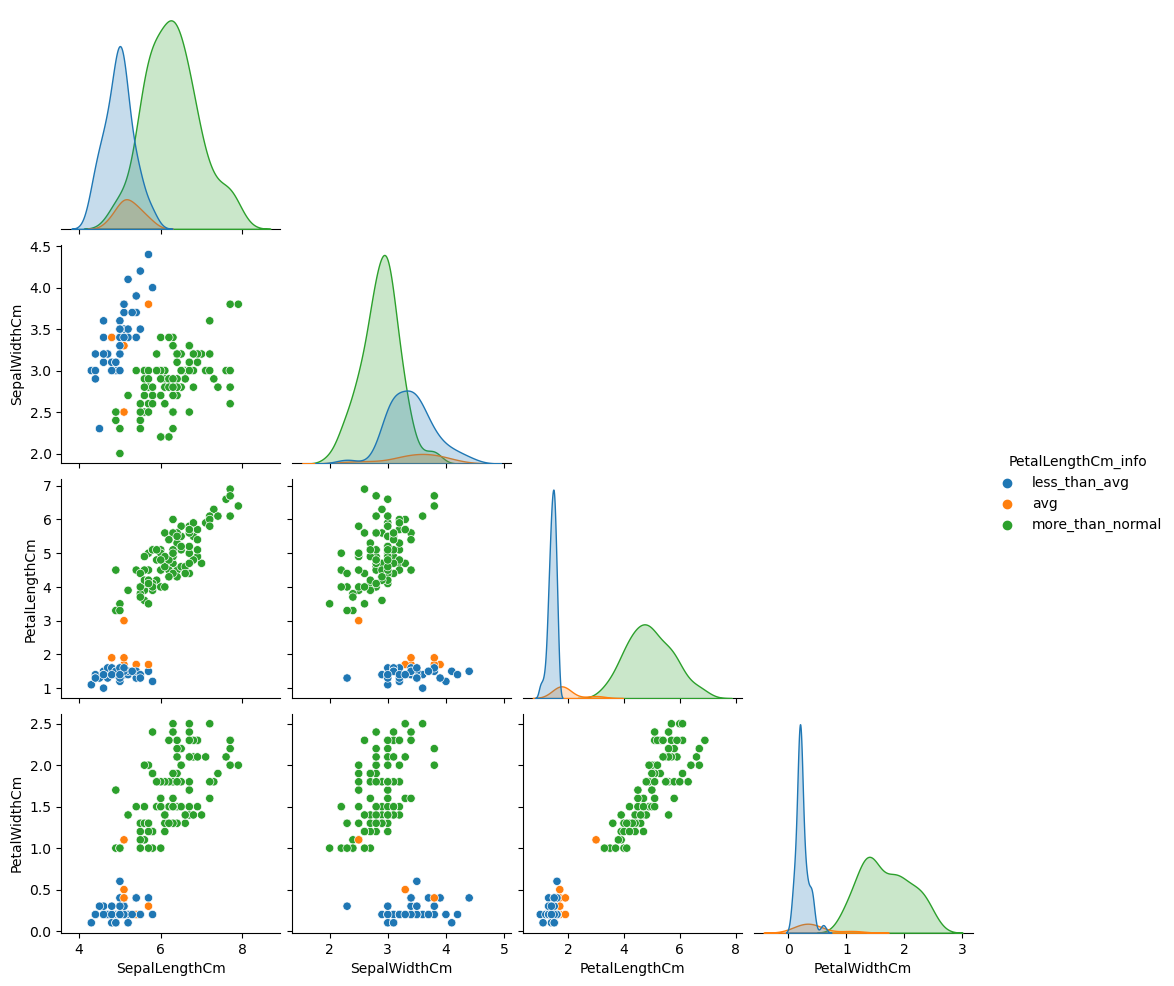

In [86]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(selected_df, corner = True, palette = 'tab10', hue = 'PetalLengthCm_info')
plt.show()